# Tables

A tutorial on `Tables` component that contains PVT properties of the geological model.

Raquired imports

In [1]:
import sys
import numpy as np

sys.path.append('..')

from deepfield import Field

Load model (this is again the HDF5 model created in the first [tutorial](./01.Basics.ipynb)):

In [2]:
model = Field(path='./model.hdf5').load()

INFO:Field:===== Field summary =====
INFO:Field:AQUIFERS attributes: 
INFO:Field:GRID attributes: MAPAXES, ACTNUM, COORD, DIMENS, ZCORN
INFO:Field:ROCK attributes: PERMX, PERMY, PERMZ, PORO
INFO:Field:STATES attributes: PRESSURE, RS, SGAS, SOIL, SWAT
INFO:Field:TABLES attributes: DENSITY, PVDG, PVTO, PVTW, ROCK, SGOF, SWOF
INFO:Field:WELLS attributes: WELSPECS, WELLTRACK, COMPDAT, WCONPROD
INFO:Field:=========================
INFO:Field:Grid pillars (`COORD`) are mapped to new axis with respect to `MAPAXES`.


List of tables the model contains

In [3]:
model.tables.attributes

('DENSITY', 'PVDG', 'PVTO', 'PVTW', 'ROCK', 'SGOF', 'SWOF')

Each table is represented by a pandas DataFrame, e.g.

In [4]:
model.tables.pvto.head()

FVF   VISC
RS    PRESSURE                
20.59 50.0      1.10615  1.180
      75.0      1.10164  1.247
      100.0     1.09744  1.315
      125.0     1.09351  1.384
      150.0     1.08984  1.453

... but in contrast to a static table, one can query interpolated values for arbitrary point. Each table has a special interpolation method based on tNavigator/Eclipse defaults.

### PVDG/PVDO

PVDG-table is used to set properties of dry gas (without dissolved oil).
Columns of the table are reference pressure (independant variable), formation volume factor and viscosity of gas (dependant ones)

In [5]:
model.tables.pvdg.head()

,FVF,VISC
PRESSURE,,
50.0,0.024958,0.01440
70.0,0.017643,0.01490
90.0,0.013615,0.01544
110.0,0.011081,0.01605
130.0,0.009352,0.01671


For dependent quantities, linear interpolation of the quantities inverse of $ B_g $ and $ B_g\mu_g $ between the given points is performed. Call-method for the table returns interpolated values ($ B_g $ and $ \mu_g $) for the given set of pressure values. Same is relevant for PVDO-table that describes PVT properties of dissolved oil. Below we query some interpolated values from the table:

In [6]:
points = np.array([40, 80, 100, 120])

model.tables.pvdg(points)

array([[0.03148504, 0.01398137],
       [0.01536947, 0.01520006],
       [0.012218  , 0.01577044],
       [0.01014335, 0.01640131]])

One can use `plot` to visualize interpolated table data:

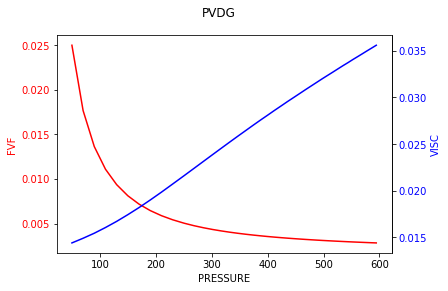

In [7]:
model.tables.pvdg.plot()

### PVTW

PVTW-table sets water properties by a single line for each region.
Columns are reference pressure (independant variable), formation volume factor, water compressibility factor, viscosity and derivative of viscosity of water which is also called viscosibility

In [8]:
model.tables.pvtw

,FVF,COMPR,VISC,VISCOSIBILITY
PRESSURE,,,,
277.0,1.038,0.000047,0.318,0.0


For calculating formation volume factor and viscosity of water at different pressure values, the following equations is used:
$$ $$
$$ B_W(p_W) = \frac{B_W(p_{ref})}{1+c_W(p_W-p_{ref}) + \frac{1}{2}c^2_{W}(p_W-p_{ref})^{2}} $$

$$ \mu_W(p_W) = \mu_{W_{ref}} \exp{\frac{1}{\mu_{W_{ref}}} \frac{\partial \mu_W}{\partial P} (p_W - p_{ref})} $$

### SWOF/SGOF

SWOF and SGOF tables are a set of points to plot relative permability curves and graphs of oil-water and gas-water capillary pressure.
Corresponding independent variables by which interpolation is performed are water and gas saturation respectively.
Linear interpolation is appled to these tables.

In [9]:
model.tables.swof.head()

,KRWO,KROW,POW
SW,,,
0.0000,0.00000,1.00000,3.75633
0.0001,0.00000,0.99900,3.75632
0.0500,0.00086,0.84782,1.86981
0.1000,0.00263,0.69746,1.23731
0.1500,0.00524,0.55717,0.91821


Query some values:

In [10]:
model.tables.swof([0.1, 0.2, 0.4, 0.6, 0.99])

array([[2.63000e-03, 6.97460e-01, 1.23731e+00],
       [8.77000e-03, 4.32860e-01, 7.24510e-01],
       [3.60800e-02, 1.22370e-01, 3.66910e-01],
       [1.03940e-01, 2.19900e-02, 2.13510e-01],
       [4.92206e-01, 2.00000e-06, 4.75860e-02]])

Plot the table:

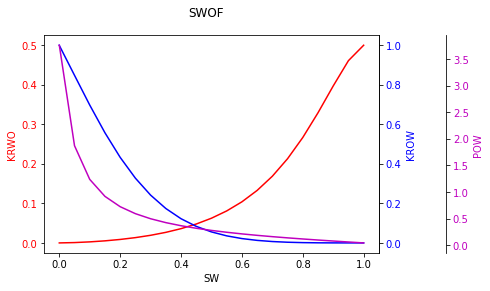

In [11]:
model.tables.swof.plot()

### PVTO

PVTO is used to set PVT properties for oil with dissolved gas.
The dataset defines the PVT properties for a given value of gas solubility, Rs. Some sets may contain data about properties of undersaturated oil for a given gas solubility. This additional data must be recorded for maximum values of Rs in each table. For the part of the table describing the unsaturated oil, gas solubility quantity is not duplicated / indicated.

In [12]:
model.tables.pvto.head()

FVF   VISC
RS    PRESSURE                
20.59 50.0      1.10615  1.180
      75.0      1.10164  1.247
      100.0     1.09744  1.315
      125.0     1.09351  1.384
      150.0     1.08984  1.453

Plot the table

In [13]:
model.tables.pvto.plot()

interactive(children=(SelectionSlider(description='RS', options=(20.59, 28.19, 36.01, 44.09, 52.46, 61.13, 70.…

### PVDG

For a saturated state, there is a one-to-one relationship between bubble point pressure and gas solubility. Current pressure value is equal to bubble point pressure: $ p = p_{bub} $. In this case, formation volume factor and viscosity of the oil are interpolated by Rs. An interpolation technique is defined by PVDG-table (linear interpolation of the quantities inverse of $ B_g $ and $ B_g\mu_g $).
If oil is in an undersaturated state, then for the current Rs value the nearest undersaturated branches are defined and further interpolation between them is performed.

In [14]:
model.tables.pvdg.head()

,FVF,VISC
PRESSURE,,
50.0,0.024958,0.01440
70.0,0.017643,0.01490
90.0,0.013615,0.01544
110.0,0.011081,0.01605
130.0,0.009352,0.01671


Done!